In [1]:
"""

    s = mybasel(N)

Calculate finite Basel sum
"""

function mybasel(N)
    s = 0.0
    for n = 1:N
        s += 1/(n^2)
    end
    
    return s
end

mybasel (generic function with 1 method)

In [2]:

round(abs(mybasel(2000) - pi^2/6), sigdigits = 1)

0.0005

In [3]:

function myrichardson(N)
    s1 = mybasel(N)
    s2 = mybasel(2*N)
    return 2*s2 - s1

end

myrichardson (generic function with 1 method)

In [4]:

round(abs(myrichardson(1000) - pi^2/6), sigdigits = 1)

2.0e-7

In [5]:

round(abs(mybasel(5000000) - pi^2/6), sigdigits = 1)

2.0e-7

In [6]:
] add QuadGK

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/workspaces/phys2200-lectures-GBH21001/Project.toml`
  No Changes to `/workspaces/phys2200-lectures-GBH21001/Manifest.toml`


In [7]:

using QuadGK

In [8]:

fun1(x) = 1/sqrt(x)

fun1 (generic function with 1 method)

In [9]:

round(quadgk(fun1, 0, 1)[1], sigdigits=5)

2.0

In [10]:

fun2(x) = exp(-x) * log(x)

fun2 (generic function with 1 method)

In [11]:

quadgk(fun2, 0, Inf)

(-0.5772156640944036, 4.619449696675028e-9)

# Euler's method for IVP

In [12]:

"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a vector of correspondinig values
of the solution, y(t_i)
"""
function myeulers(fun, a, b, n, y1)
    t = range(a,b,n)
    y = zeros(n)
    h = t[2] - t[1]
    y[1] = y1
    for i = 1:(n - 1)
        y[i+1] = y[i] + h * fun(t[i], y[i])
    end
    return t, y
end

myeulers

In [13]:

a = 0.0
b = 5.0
n = 64
y1 = 0.0
fun(t,y) = exp(-sin(t)) - y * cos(t)
yexact(t) = t * exp(-sin(t))

yexact (generic function with 1 method)

In [14]:

t, y = myeulers(fun, a, b, n, y1);

In [15]:
y

64-element Vector{Float64}:
  0.0
  0.07936507936507936
  0.14640193018250997
  0.20269028461468805
  0.2497478530729569
  0.28900181860488144
  0.32177099820448435
  0.34925697539482514
  0.3725424425763906
  0.3925950689158003
  0.4102753817819775
  0.4263473749584481
  0.44149080162884974
  ⋮
  8.803086847849052
  9.371766442604601
  9.922618991205706
 10.445763430536573
 10.931171825013662
 11.369030734090003
 11.750125683122171
 12.066226287320763
 12.310447408013015
 12.477561679832434
 12.56424103542065
 12.569209387626104

In [16]:

using PyPlot

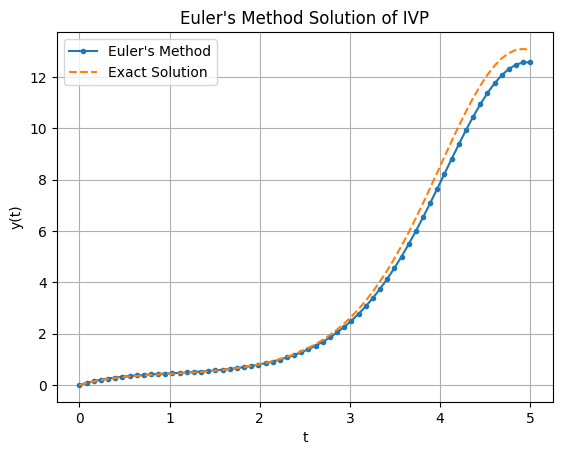

In [17]:

plot(t, y, label="Euler's Method", marker=".")
plot(t, yexact.(t), label="Exact Solution", linestyle="dashed")
legend()
xlabel("t")
ylabel("y(t)")
title("Euler's Method Solution of IVP")
grid(true)

In [18]:

np = 9
hh = zeros(np)
gerr = zeros(np)

for i = 1:np
    n = 2^(i+3)
    t, y = myeulers(fun, a, b, n, y1);
    hh[i] = t[2] - t[1]
    gerr[i] = abs(yexact(b) - y[end])
end

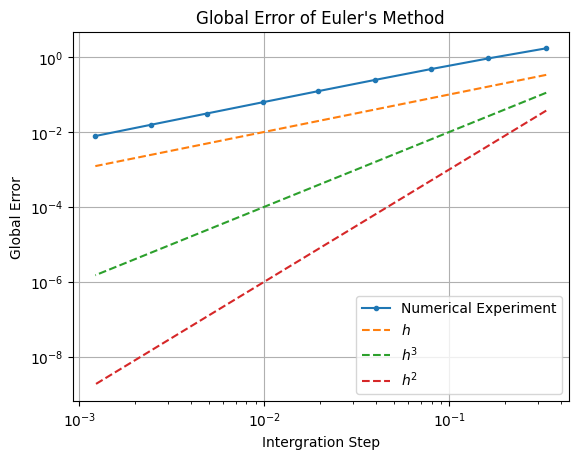

In [19]:

loglog(hh, gerr, marker=".", label="Numerical Experiment")
loglog(hh, hh, linestyle="dashed", label=L"h")
loglog(hh, hh.^2, linestyle="dashed", label=L"h^3")
loglog(hh, hh.^3, linestyle="dashed", label=L"h^2")

xlabel("Intergration Step")
ylabel("Global Error")
title("Global Error of Euler's Method")
legend()
grid(true)

In [20]:

#Ignore the text here. This is just for testing